<a href="https://colab.research.google.com/github/samhithabodangi/Organ-Rejection-Model/blob/main/Binary%20Classification%20Gene%20Expression/gse21260.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data handling
import pandas as pd
import numpy as np
import io
from google.colab import files

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [ ]:
uploaded = files.upload()

Saving Model.xlsx to Model.xlsx


In [ ]:
dataframe = pd.read_excel(io.BytesIO(uploaded.get('Model.xlsx')))

In [ ]:
dataframe.shape

(969, 771)

In [ ]:
dataframe.columns[-1]

'Class'

In [ ]:
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
print(dataframe['Class'].value_counts())

No Rejection                 532
T cell-mediated Rejection    437
Name: Class, dtype: int64


In [ ]:
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [ ]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['No Rejection', 'T cell-mediated Rejection'], dtype=object)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
MI=mutual_info_classif(X_train_norm,y_train)

In [ ]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [ ]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [ ]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred=RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [ ]:
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.7328
precision:0.7470
recall:0.7423
f1score:0.7379


classification report


                           precision    recall  f1-score   support

             No Rejection       0.72      0.85      0.78       105
T cell-mediated Rejection       0.77      0.62      0.69        89

                 accuracy                           0.74       194
                macro avg       0.75      0.73      0.73       194
             weighted avg       0.75      0.74      0.74       194



In [ ]:
linear_mdl = svm.SVC(kernel='linear', gamma='scale',C=1, probability=True).fit(X_train_selected, y_train)
y_pred=linear_mdl.predict(X_test_selected)

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.7760
precision:0.7870
recall:0.7835
f1score:0.7810


classification report


                           precision    recall  f1-score   support

             No Rejection       0.76      0.87      0.81       105
T cell-mediated Rejection       0.81      0.69      0.74        89

                 accuracy                           0.78       194
                macro avg       0.79      0.78      0.78       194
             weighted avg       0.79      0.78      0.78       194



In [ ]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_selected, y_train)

y_pred = knn_classifier.predict(X_test_selected)

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.7890
precision:0.7944
recall:0.7938
f1score:0.7927


classification report


                           precision    recall  f1-score   support

             No Rejection       0.79      0.85      0.82       105
T cell-mediated Rejection       0.80      0.73      0.76        89

                 accuracy                           0.79       194
                macro avg       0.80      0.79      0.79       194
             weighted avg       0.79      0.79      0.79       194



In [ ]:
model_names = ['Random Forest', 'Support Vector Machine', 'K-Nearest Neighbor']

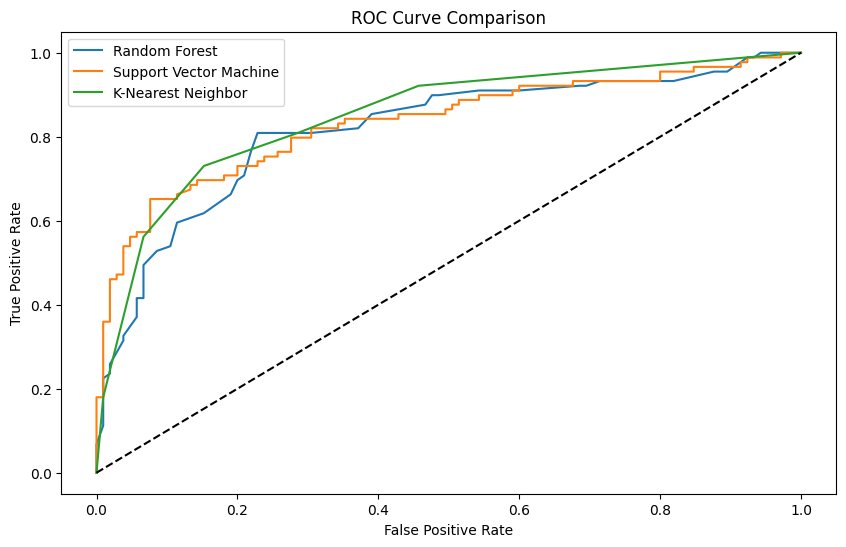

In [ ]:
plt.figure(figsize=(10, 6))

for i, model in enumerate([RF, linear_mdl, knn_classifier]):
  fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
  plt.plot(fpr, tpr, label=model_names[i])

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')

plt.legend()
plt.show()
